<a href="https://colab.research.google.com/github/sara1301/LinearAlgebra_Lab/blob/main/9812762781_sara_Ghavampour_Lab_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Linear Algebra - Lab 2
Ferdowsi University of Mashhad - Computer Engineering Department

Fall 2021

### Table of Contents

* [Projection matrices and least squares](#sec1)
    * [Exercise 1](#sec2)
* [Solving the least squares equation via QR Decomposition](#sec3)
    * [Exercise 2](#sec4)

* [Predicting Medical Cost with Linear regression](#sec5)
    * [Data Preprocessing](#sec5_1)
    * [Model building](#sec5_2)
    * [Training the Model](#sec5_3)
        * [Exercise 3](#sec5_4)
    * [Model Evaluation](#sec5_5)
        * [Exercise 4](#sec5_6)
* [Optional Excersice](#sec6)

# Projection matrices and least squares <a class="anchor" id="sec1"></a>

### Least square approximation
A crucial application of least squares is fitting a straight line to $m$ points.

Consider five points in the plane: 

$$ (x_i, y_{i}) = (1, 4), (2, 8), (4, 10) , (5, 12), (7, 18)$$

- Find the closest line to these five points.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

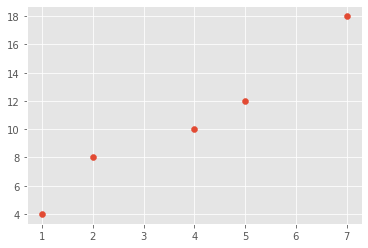

In [ ]:
x = np.array([[1], [2], [4], [5], [7]]) 
y = np.array([[4], [8], [10], [12], [18]]) 
plt.scatter(x, y)
plt.show()

- No straight line $ y = \theta_0 + \theta_1 x  $ goes through these five points. 
- We are looking for numbers $\theta_0$ and $\theta_1 $that satisfy five equations:
     
$$ (x_1 = 1) \;\;\;\; y_1 = \theta_0 + 1\theta_1 = 4 $$
     
$$ (x_2 = 2) \;\;\;\; y_2 = \theta_0 + 2\theta_1 = 8 $$
     
$$ (x_3 = 4) \;\;\;\; y_3 = \theta_0 + 4\theta_1 = 10 $$

$$ (x_4 = 5) \;\;\;\; y_4 = \theta_0 + 5\theta_1 = 12 $$

$$ (x_5 = 7) \;\;\;\; y_5 = \theta_0 + 7\theta_1 = 18 $$
    
    
- This 5 by 2 system has no solution, $ y = (4, 8, 10, 12, 18) $ is not a combination of the columns of $X$.

$$X = \begin {bmatrix} 1 & 1 \\ 1 & 2 \\ 1 & 4\\ 1 & 5 \\ 1 & 7  \end{bmatrix} \;\;\;\; \theta = \begin {bmatrix} \theta_0 \\ \theta_1 \end{bmatrix} \;\;\;\; y = \begin {bmatrix} 4 \\ 8 \\ 10\\ 12 \\18 \end{bmatrix} \;\;\;\; X \theta = y \;\; \text{is not solvable} $$



#### Minimizing the Error

- Now that we cannot fit a line that goes through all five points, we try to find the best line $(\hat{\theta})$ for the five points and minimize the overall error, the error is 
    $ | e |^2 = | y - X\hat{\theta} |^2 $
    
- In order to minimize the error, we look for the closest point to $y$ that is in the column space of $X$, the nearest point is $p$ (the projection of $b$ into $A$.)

- Every vector $b$ splits into two parts, The part in the column space is $p$. and The perpendicular part is $e. \; (y = p + e) $

- We can find $\hat{\theta}$ (best fitting line) by solving the equation $ X^T X  \hat{\theta} = X^T y$

$$ \hat{\theta} = \begin {bmatrix} \hat{\theta_0} \\ \hat{\theta_1} \end{bmatrix} \;\;\;\;\;\;\; \hat{\theta} =  (X^T X)^{-1} X^T y $$ 


## Exercise 1 <a class="anchor" id="sec2"></a>


In [ ]:
X = np.array([[1, 1], [1, 2], [1, 4], [1, 5], [1, 7]]) 
y = np.array([[4], [8], [10], [12], [18]]) 

**Question 1:** calculate $\hat{\theta}$ for the given data points.

In [ ]:
from numpy.linalg import inv
theta_hat =inv(X.T.dot(X)).dot(X.T.dot(y.reshape(5,1)))
print(theta_hat)

[[2.33333333]
 [2.12280702]]


so the best line that minimizes the overall error is 

$$h(x_i) = \hat{\theta_0} + \hat{\theta_1} \times x_i = 2.33 + 2.12 \times x_i \;\;\;\;\;\text{(this is the hypothesis function)} \;\; \text{and} \;\;  h = X \hat{\theta} $$

**Question 2:** calculate $h$ (matrix of predicted $y$):

In [ ]:
h = X.dot(theta_hat)
print(h)
#h[0], h[1], h[2], h[3] and h[4] are predicted points for y0, y1, y2, y3 and y4 

[[ 4.45614035]
 [ 6.57894737]
 [10.8245614 ]
 [12.94736842]
 [17.19298246]]


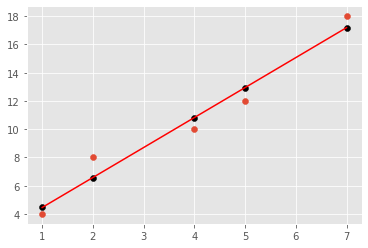

In [ ]:
plt.scatter(x, y)
plt.scatter(x, h, color = 'black')
plt.plot(x, h, color = 'red')
plt.show()
#red line is the best line for that three points

A problem with this approach is the matrix inverse that is both computationally expensive and numerically unstable. An alternative approach is to use a matrix decomposition to avoid this operation. We will look at QR decomposition in the following section.

# Solving the least squares equation via QR Decomposition <a class="anchor" id="sec3"></a>

- The QR decomposition (also called the QR factorization) of a matrix is a decomposition of the matrix into an orthogonal matrix and a triangular matrix. 
$$ A = QR $$
where $Q$ is an orthogonal matrix ($Q^T Q = I$) and $R$ is an upper triangular matrix. 
- $Q$ is a $m*n$ matrix and $R$ is an upper triangle matrix with the size $n * n$

An Orthogonal Matrix $Q$ with orthonormal columns satisfies $ Q^T Q = I$ :

$$Q^T Q = \begin {bmatrix}  & q_1^T & \\  & q_2^T  & \\ & q_3^T & \end{bmatrix} \begin {bmatrix}  &  & \\ q_1 & q_2 & q_3 \\ & & \end{bmatrix} = 
\begin {bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix} = I $$ 
There are several methods for computing the QR decomposition. One of such method is the Gram-Schmidt process.

### The Gram-Schmidt Process 

Start with the independent columns of $A$: $a_1, a_2, ..., a_n$. We want to construct orthogonal vectors $u_1, u_2, ..., u_n$. Then we divide $u_1, u_2, ..., u_n$ by their lengths.

That produces orthonormal vectors $q_1 = \frac{u_1}{||u_1||}, q_2 = \frac{u_2}{||u_2||}, ..., q_n = \frac{u_n}{||u_n||} $


Begin by choosing $u_1 = a_1$. This first direction is accepted as it comes.
The next direction $u_2$ must be perpendicular to $u_1$. Start with $a_2$ and subtract its projection along $u_1$. This leaves the perpendicular part, which is the orthogonal vector $u_2$:

$$ \text{First Gram-Schmidt step} \;\;\;\;\;\;\;\; u_2 = a_2 - \frac{u_1^T a_2}{u_1^T u_1} u_1.$$

so now $u_1$ and $u_2$ are orthogonal.
The third direction starts with $a_3$. This is not a combination of $u_1$ and $u_2$ (because $a_3$ is not a combination of $a_1$ and $a_2$). But most likely $a_3$ is not perpendicular to $u_1$ and $u_2$. So subtract off its components in those two directions to get a perpendicular direction $u_3$:

$$ \text{Next Gram-Schmidt step} \;\;\;\;\;\;\;\; u_3 = a_3 - \frac{u_1^T a_3}{u_1^T u_1} u_1 - \frac{u_2^T a_3}{u_2^T u_2} u_2.$$

This is the idea of the Gram-Schmidt process. Subtract from every new
vector its projections in the directions already set. That idea is repeated at every step.
For the fourth vector $a_4$, we would subtract three projections onto $u_1, u_2, u_3$ to get $u_4$.

$$u_x = a_x - \sum_{i=1}^{x-1} (\frac{u_i^T . a_x}{u_i^T . u_i})\; u_i \;\;\;\;\; \text{ for x = 2, ..., n}$$

At the end, or immediately when each one is found, divide the orthogonal vectors $u_1, u_2, ..., u_n$ by their lengths. The resulting vectors $q_1, q_2, ..., q_n$ are orthonormal.

$$q_x = \frac{u_x}{||u_x||} \;\;\;\;\; \text{ for x = 1, ..., n}$$


$$Q = \begin {bmatrix} q_1 \;|\; q_2 \;|\; ... \;|\; q_n\end{bmatrix} \;\;\; \text{q's are columns of Q}$$

We started with a matrix $A$ and ended up with a matrix $Q$. How are those matrices related? matrix $R$ connects them, $A = QR$

For a $3$by $3$ matrix A: 
$$ A = \begin {bmatrix}  &  & \\ a_1 & a_2  & a_3 \\ & & \end{bmatrix} 
= QR
= \begin {bmatrix}  &  & \\ q_1 & q_2 & q_3 \\ & & \end{bmatrix} 
\begin {bmatrix} q_1^T a_1 & q_1^T a_2 & q_1^T a_3\\  & q_2^T a_2 & q_2^T a_3 \\ & & q_3^T a_3 \end{bmatrix} $$

## Implementing Gram-Schmidt process 
## Exercise 2 <a class="anchor" id="sec4"></a>
**Question 1:** implement the function `qr_gram_schmidt` which takes the matrix $A$ and returns the $Q$ and $R$ using gram schmidt process.

In [ ]:
from numpy.linalg import norm
def qr_gram_schmidt(A):
    row = A.shape[0]
    col = A.shape[1]
    Q =  np.zeros((row, col))
    R =  np.zeros((col, col)) 

    for j in range(col):
        v = A[:,j]
        for i in range(j):
            R[i,j] =  np.dot(Q[:,i].T , A[:,j])
            v = v.squeeze() - (R[i,j] * Q[:,i])
        R[j,j] =  np.linalg.norm(v)
        Q[:,j] = (v / R[j,j]).squeeze()
    return Q, R

- Using QR decomposition, the coefficients can be found as follows:
$$ \hat{\theta}_{qr} = R^-1 \; Q^T \; y$$

**Question 2:** calculate $\hat{\theta}_{qr}$ for $X$ and $y$ using QR decomposition and `qr_gram_schmidt` function:

In [ ]:
q, r = qr_gram_schmidt(X)
theta_hat_qr = inv(r).dot(q.T).dot(y)
print(theta_hat_qr)
print(q)
print(r)

[[2.33333333]
 [2.12280702]]
[[ 0.4472136  -0.58639547]
 [ 0.4472136  -0.37696852]
 [ 0.4472136   0.04188539]
 [ 0.4472136   0.25131234]
 [ 0.4472136   0.67016625]]
[[2.23606798 8.49705831]
 [0.         4.77493455]]


Note that we get the same result by using QR decompositon.

# Predicting Medical Cost with Linear regression <a class="anchor" id="sec5"></a>


Now we want to build a model to predict medical cost using Linear regression and least square approximation. we use Medical Cost Personal Dataset. this dataset consists of age, sex, bmi, children, smoker and region as __independent variables__ and charges as __dependent variable__.

- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index
- children: Number of children covered by health insurance 
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

In the previous example (that we tried to fit a line through some points), there was only one independent variable. the hypothesis function we used was as follows:
$$ h(x_i) = \hat{\theta_0} + \hat{\theta_1} x_i : \;\;\;\;
\begin{bmatrix} 1&x_1\\1&x_2\\.&.\\.&.\\1&x_m\end{bmatrix} 
\begin{bmatrix}\hat{\theta_0}\\\hat{\theta_1}\end{bmatrix} 
= \begin{bmatrix} h(x_1)\\h(x_2)\\.\\.\\h(x_m)\end{bmatrix} 
\;\;\;\;\;\; \text{($x_i$ is indepedent variable and $y_i$ is dependent variable)} $$

($h(x_i)$ is the predicted value of $y_i$)

In this dataset we have multiple independent variables, so we use __Multiple linear regression__.


In [ ]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

Looking at the shape of dataset, there are $m=1338$ training examples and $n=7$ variables. Target variable here is __charges__. using multiple linear regression, hypothesis function looks like this: 
$$h(x_i) = age \times \theta_1 + sex \times \theta_2 + bmi \times \theta_3 + children \times \theta_4 + smoker \times \theta_5 + region \times \theta_6 \;\;\; (\text{for the $i^{th}$ training example})$$
($h(x_i)$ is the predicted value of $i^{th} $training example, $\theta_1, ..., \theta_6$ are coefficants of hypothesis function.)

The $i^{th}$ training example can be represented as:
$$x_i =  \begin{bmatrix} x_{i1}&x_{i2}&...&x_{i6} \end{bmatrix}=  \begin{bmatrix} age_{1}&sex_{2}&...&region_{6} \end{bmatrix}$$
now we combine all training examples into single input matrix of size(m, n):
$$ \mathbf{X}= \left( \begin{smallmatrix} x_{11} & x_{12} &.&.&.&.& x_{1n}\\
                                x_{21} & x_{22} &.&.&.&.& x_{2n}\\
                                x_{31} & x_{32} &.&.&.&.& x_{3n}\\
                                .&.&.&. &.&.&.& \\
                                .&.&.&. &.&.&.& \\
                                x_{m1} & x_{m2} &.&.&.&.&. x_{mn}\\
                                \end{smallmatrix} \right)_{(m,n)}$$
We represent coefficients of function and dependent variable in vector form as  
$$\theta = \left (\begin{matrix} \theta_1 \\ \theta_2 \\ .\\.\\ \theta_6 \end {matrix}\right)\; , \;\;
\mathbf{ y } = \left (\begin{matrix} y_1\\ y_2\\. \\. \\ y_i \\. \\. \\ y_m \end{matrix} \right)$$

So we represent hypothesis function in vectorize form $$\mathbf{ h_\theta{(x)} = X\theta}$$

## Data Preprocessing<a class="anchor" id="sec5_1"></a>

The hypothesis function can't work with categorical data directly, categorical data must be converted to numbers.

__Label encoding__ is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.

__One hot encoding__ is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

- for 'sex' and 'smoker' column we will apply Label Encoding as there are only 2 catagories
- for 'region' we will apply OneHot Encoding as there are more than 2 catagories

In [ ]:
#By using pandas get_dummies function we can apply Label encoding and OneHot encoding in line of code. 

# Label Encoding:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])

# OneHot Encoding:
df_encode = pd.get_dummies(data = df, prefix = 'IsIn', prefix_sep='_',
               columns = ['region'],
               drop_first =False,
              dtype='int8')

df_encode.head()

,age,sex,bmi,children,smoker,charges,IsIn_northeast,IsIn_northwest,IsIn_southeast,IsIn_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


since we used one hot encoding, some dummy variables were added to the indpendent variables. Now the hypothesis function is as follows: 

$$h(x_i) =  age .\theta_1 + sex .\theta_2 + bmi  .\theta_3 + children . \theta_4 + smoker .\theta_5 + \\
\text{IsIn_northeast} .\theta_6 + \text{IsIn_northwest} .\theta_7 + \text{IsIn_southeast} . \theta_8 + \text{IsIn_southwest} . \theta_9 $$

Now that all inputs are numeric, we begin to build our model.
## Model building<a class="anchor" id="sec5_2"></a>

First we have to build the following matrices:
$$h_{(x)} =X\theta \;\; \rightarrow \;\;\;
\begin{bmatrix}
x_{11}&x_{12}&...&x_{19}\\
x_{21}&x_{22}&...&x_{29}\\
.&.&...&.\\
x_{m1}&x_{m2}&...&x_{m9}\\
\end{bmatrix} \;\;
\begin{bmatrix}\theta_1\\\theta_2\\\theta_3\\\theta_4\\\theta_5\\\theta_6\\\theta_7\\\theta_8\\\theta_9\end{bmatrix}
= \begin{bmatrix} h(x_1)\\h(x_2)\\.\\h(x_m)\end{bmatrix} \;\;,\;\; 
\mathbf{ y } = \begin{bmatrix} y_1\\y_2\\.\\y_m\end{bmatrix}
$$



_Type your answer here, replacing this text._

In [ ]:
#X = df_encode.iloc
X=df_encode.drop('charges',axis=1).values
y = df_encode['charges'].values.T

print(X)
print(y)


[[19.    0.   27.9  ...  0.    0.    1.  ]
 [18.    1.   33.77 ...  0.    1.    0.  ]
 [28.    1.   33.   ...  0.    1.    0.  ]
 ...
 [18.    0.   36.85 ...  0.    1.    0.  ]
 [21.    0.   25.8  ...  0.    0.    1.  ]
 [61.    0.   29.07 ...  1.    0.    0.  ]]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


### Spliting data 
in order to evaluate our model, we should split the data into training examples and test examples: 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)


X_train.shape, X_test.shape

((1070, 9), (268, 9))

## Training the Model<a class="anchor" id="sec5_3"></a>

We want to find vector of coefficients ($\theta$), then use the coefficients to predict charges ($h(x)$).

## Exercise 3<a class="anchor" id="sec5_4"></a>

Using QR decomposition, the coefficients can be found as follows:
$$ \theta = R^-1 \; Q^T \; y$$

**Question 1:** calculate $Q$ and $R$ using the `qr_gram_schmidt` function, then calculate $\theta$:

In [ ]:
Q, R =qr_gram_schmidt(X_train)
from numpy.linalg import inv
theta  = inv(R).dot(Q.T).dot(y_train)
print(X_train)
print(Q)
print(R)
print(theta)

[[50.     1.    32.205 ...  1.     0.     0.   ]
 [24.     0.    27.6   ...  0.     0.     1.   ]
 [48.     1.    29.7   ...  0.     1.     0.   ]
 ...
 [46.     1.    25.745 ...  1.     0.     0.   ]
 [55.     1.    32.67  ...  0.     1.     0.   ]
 [37.     1.    29.8   ...  0.     0.     1.   ]]
[[ 0.03653521  0.02498268 -0.01517227 ...  0.05040734 -0.00442513
  -0.02155714]
 [ 0.0175369  -0.01573214  0.03546665 ... -0.01384171 -0.03692243
   0.05275169]
 [ 0.0350738   0.02629369 -0.01870042 ... -0.02189268  0.04566492
   0.01131   ]
 ...
 [ 0.03361239  0.0276047  -0.02627864 ...  0.04915539  0.00651202
  -0.00060123]
 [ 0.04018873  0.02170515 -0.02254518 ... -0.02585404  0.04219796
  -0.0096379 ]
 [ 0.02703605  0.03350425  0.0006567  ... -0.01915661 -0.04009294
   0.02546968]]
[[ 1.36854302e+03  1.55318464e+01  9.52130269e+02  3.33851397e+01
   6.24094374e+00  7.34138412e+00  7.24785399e+00  8.43451746e+00
   7.74765560e+00]
 [ 0.00000000e+00  1.73136289e+01  1.14106286e+02  3.4924

#### Prediction from our Model

now that we have $\theta$, using our hypothesis function we can predict charges:
$$h(x) = \mathbf{X} \theta $$

**Question 2:** calculate predicted charges both for training data and testing data:

In [ ]:
#y_train_pred is the hypothesis function prediction of training examples
y_train_pred = X_train.dot(theta)
#y_test_pred is the hypothesis function prediction of test examples
y_test_pred  = X_test.dot(theta)
print(y_test.shape)

(268,)


Text(0.5, 0, 'Index')

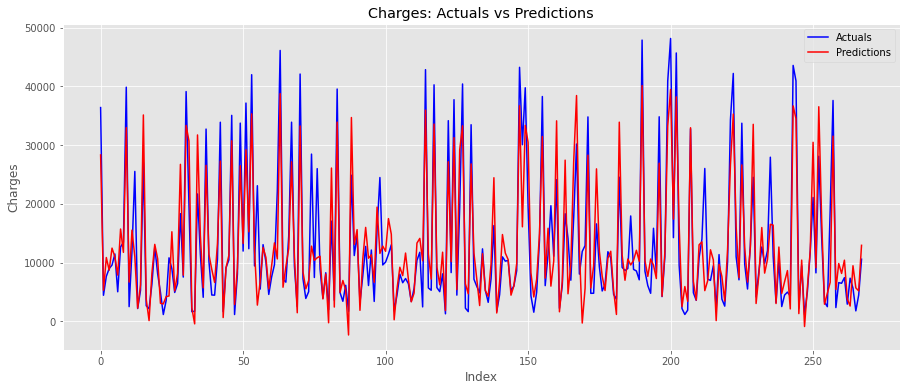

In [ ]:
import seaborn as sns
plt.style.use('ggplot')
fig, ax=plt.subplots(figsize=(15,6))
sns.lineplot(x=np.arange(len(y_test)) , y=y_test, label='Actuals',color='blue',ax=ax)
sns.lineplot(x=np.arange(len(y_test)), y=y_test_pred, label='Predictions',color='red',ax=ax)
ax.set_title('Charges: Actuals vs Predictions')
ax.set_ylabel('Charges')
ax.set_xlabel('Index')

# Model Evaluation<a class="anchor" id="sec5_5"></a>

We predicted value for charges by using our model coefficients for test data set. Now we will compare the predicted value with actual value in test set. 

$\mathbf{R^2}$ is statistical measure of how close data are to the fitted regression line. $\mathbf{R^2}$ is always between 0 to 100%. 0% indicates that model explains none of the variability of the response data around it's mean. 100% indicates that model explains all the variablity of the response data around the mean.

$$\mathbf{R^2 = 1 - \frac{SSE}{SST}}$$
**SSE = Sum of Square Error**  
**SST = Sum of Square Total**  
$$\mathbf{SSE = \sum_{i=1}^{m}(h(x_i) - y_i)^2}$$
$$\mathbf{SST = \sum_{i=1}^{m}(h(x_i) - \bar{y}_i)^2} \;\;\; \text{($\mathbf{\bar{y}}$ is mean value of $\mathbf{y}$)}$$


## Exercise 4: <a class="anchor" id="sec5_6"></a>


**Question 1:** calculate $R^2$ score of testing data using $\mathbf{R^2 = 1 - \frac{SSE}{SST}}$: 

In [ ]:
sse_test_data = np.sum((y_test_pred-y_test)**2)
sst_test_data = np.sum((y_test_pred-y_test.mean())**2)
R_square_test_data = 1 - sse_test_data / sst_test_data

print(R_square_test_data)

0.7353952527860419


A $R^2$ score above 0.70 for our model is good enough for purpose of this homework and it fits our data test very well.

## Overfitting
A concern with multiple regression is overfitting; with a lot of predictors and a
limited number of samples, random sampling fluctuations will allow some linear
combination of the predictors to match the predictand perfectly over the limited
samples we have, but the correlations will fall apart for a different set of samples.

we can calculate $R^2$ score of training data set and compare it to $R^2$ score of testing data set and check if overfitting happens:

In [ ]:
sse_train_data = np.sum((y_train_pred-y_train)**2)
sst_train_data =np.sum((y_train_pred-y_train.mean())**2)
R_square_train_data = 1- sse_train_data /sst_train_data

print(R_square_train_data)
print(R_square_test_data)

0.646823687914824
0.7353952527860419


(Difference between $R^2$ score of training and testing data should not be drastic and overfitting should not happen)

## Optional Excersice: <a class="anchor" id="sec6"></a>


students are welcome to use other regression techniques to improve performance and build a model for this data set that predicts **Charges** more accurately.

> This document was compiled, gathered and coded by the teaching assistant team and may be used only for educational purposes. The authors would like to thank the many projects and educational material that made their source code freely available on the internet, especially otter-grader that made the generation and sanitization of the notebook easier.